In [ ]:
%matplotlib inline 

This demo builds a few toy models for classifying handwritten digitis with high accuracy. It is a modification of a notebook build by Daniel Moser, with resoures by Xavier Snelgrove and Yash Kataria. 

## The Task for the AI

Our goal is to construct and train an artificial neural network on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database which contains 60,000 images for training and 10,000 test images.

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/mnist.png?raw=1" >

## Prerequisite Python Modules

First, some software needs to be loaded into the Python environment.

In [ ]:
import numpy as np                   # math functions 
import matplotlib.pyplot as plt      # plotting
import random                        # for generating random numbers

from keras.datasets import mnist     # MNIST dataset 
from keras.models import Sequential  # Model type to be used

from keras.layers.core import Dense, Dropout, Activation # Types of layers to be used in our model
from keras.utils import np_utils                         # NumPy related tools
import tensorflow as tf

## Loading Training Data



In [ ]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


This command returns four tuples which have the following format:

x_train: uint8 NumPy array of grayscale image data with shapes (60000, 28, 28), containing the training data. Pixel values range from 0 to 255.

y_train: uint8 NumPy array of digit labels (integers in range 0-9) with shape (60000,) for the training data.

x_test: uint8 NumPy array of grayscale image data with shapes (10000, 28, 28), containing the test data. Pixel values range from 0 to 255.

y_test: uint8 NumPy array of digit labels (integers in range 0-9) with shape (10000,) for the test data.

Using matplotlib, we can plot some sample images.

Text(0.5, 1.0, '7')

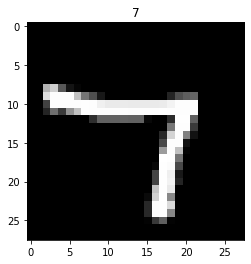

In [ ]:

num = random.randint(0, len(X_train)) #generate a random integer
plt.imshow(X_train[num], cmap='gray', interpolation='None') #plot an image with the index generated at previous step
                                                              # cmap='grey' controls how the pixel values 0-255 are mapped to images
                                                              # interpolation='none' is needed to display the image properly because 
                                                              # plt.imshow() actually makes a number of modifications in the desire to correct
                                                              # various sampling artifacts
plt.title(y_train[num])



In [ ]:

def matprint(mat):
    
    for x in mat: #here x is a row of mat 
        for y in x: #here y is an element of x
          #if we just print y, the image will be uneven because longer digits take longer
          #to see this, look at the result when you comment out the next three lines and replace 
          #the end in the print to " "

          l = len(str(y)) # l is number of digits in the number y
          l2 = 4-l 
          s = ' ' * l2 #create empty string of size l2 
                       #the above three lines ensure that digits are three spaces apart
          print(y, end=s)
        print("")

# now print!        
matprint(X_train[num])

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
0   0   178 207 88  20  5   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

Let's examine a single digit a little closer, and print out the array representing the last digit.

## Formatting the input data layer

Instead of a 28 x 28 matrix, we build our network to accept a 784-length vector.

Each image needs to be then reshaped (or flattened) into a vector. We'll also normalize the inputs to be in the range [0-1] rather than [0-255]. 

<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/flatten.png?raw=1' >

In [ ]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


We then modify our classes (unique digits) to be in the one-hot format, i.e.

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

If the final output of our network is very close to one of these classes, then it is most likely that class. For example, if the final output is:

```
[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]
```
then it is most probable that the image is that of the digit `1`.

In [ ]:
nb_classes = 10 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Building a 3-layer fully connected network (FCN)

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/figure.png?raw=1" />

In [ ]:
# The Sequential model is a linear stack of layers and is very common.

model = Sequential()

## The first hidden layer

In [ ]:
# The first hidden layer is a set of 512 neurons.


model.add(Dense(512, input_shape=(784,)))  #Dense means the layer is fully connected (every input goes to every output)

In [ ]:


model.add(Activation('relu'))

## Adding the second hidden layer

In [ ]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.

model.add(Dense(512))
model.add(Activation('relu'))


## The Final Output Layer

In [ ]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).
model.add(Dense(10))

In [ ]:
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))

In [ ]:
# Summarize the built model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
__________________________________________________

## Compiling the model

Keras is built on top of Theano and TensorFlow. Both packages allow you to define a *computation graph* in Python, which then compiles and runs efficiently on the CPU or GPU without the overhead of the Python interpreter.

When compiing a model, Keras asks you to specify your **loss function** and your **optimizer**. The loss function we'll use here is called *categorical cross-entropy*, and is a loss function well-suited to comparing two probability distributions.


In [ ]:
# Model parameters
#model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


## Train the model!
This is the fun part! 

The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

So a good batch size may take some trial and error to find!

In [ ]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=7,
          verbose=1) #note that the batches are not actually chosen randomly, but rather the method goes through the data set sequentially
                     # can sort of change that by including the parameter shuffle=true, which randomly shuffles the traininst  set first
                     # an epoch is a complete pass through the whole data set
                     # verbose = 1 gives you an animated progress bar

Epoch 1/7
469/469 [==============================] - 2s 4ms/step - loss: 0.1816 - accuracy: 0.9458
Epoch 2/7
469/469 [==============================] - 2s 4ms/step - loss: 0.0760 - accuracy: 0.9767
Epoch 3/7
469/469 [==============================] - 2s 4ms/step - loss: 0.0491 - accuracy: 0.9844
Epoch 4/7
469/469 [==============================] - 2s 4ms/step - loss: 0.0333 - accuracy: 0.9890
Epoch 5/7
469/469 [==============================] - 2s 4ms/step - loss: 0.0260 - accuracy: 0.9916
Epoch 6/7
469/469 [==============================] - 2s 4ms/step - loss: 0.0214 - accuracy: 0.9929
Epoch 7/7
469/469 [==============================] - 2s 4ms/step - loss: 0.0183 - accuracy: 0.9941


The two numbers, in order, represent the value of the loss function of the network on the training set, and the overall accuracy of the network on the training data. But how does it do on data it did not train on?

## Evaluate Model's Accuracy on Test Data

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0814 - accuracy: 0.9793
Test score: 0.08140517771244049
Test accuracy: 0.9793000221252441


### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [ ]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_temp = model.predict(X_test)
predicted_classes=np.argmax(predicted_temp,axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]


incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

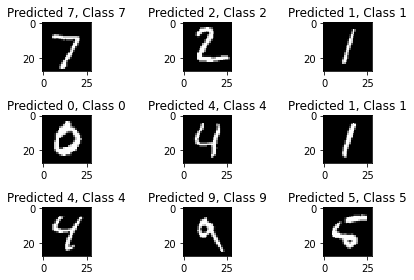

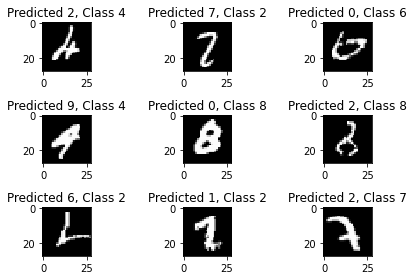

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap = 'gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()